In [1]:
#importing libraries
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("M1_final.csv")
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [3]:
print(data.shape)

(28820, 23)


In [4]:
data.drop("TAIL_NUM",axis=1,inplace=True)
print(data.shape)

(28820, 22)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   DEST               28820 non-null  object 
 5   DEP_DELAY          28820 non-null  int64  
 6   CRS_ELAPSED_TIME   28820 non-null  int64  
 7   DISTANCE           28820 non-null  int64  
 8   CRS_DEP_M          28820 non-null  int64  
 9   DEP_TIME_M         28820 non-null  int64  
 10  CRS_ARR_M          28820 non-null  int64  
 11  Temperature        28820 non-null  int64  
 12  Dew Point          28820 non-null  object 
 13  Humidity           28820 non-null  int64  
 14  Wind               28818 non-null  object 
 15  Wind Speed         28820 non-null  int64  
 16  Wind Gust          288

In [6]:
data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [7]:
data = data.dropna()
data.isnull().sum()
print('Dataframe dimensions:', data.shape)
data.head()

Dataframe dimensions: (28818, 22)


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,CHS,-1,124,636,324,323,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,LAX,-7,371,2475,340,333,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,FLL,40,181,1069,301,341,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,MCO,-2,168,944,345,343,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,ATL,-4,139,760,360,356,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


# Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()

data['OP_UNIQUE_CARRIER'] = label_encoder.fit_transform(data['OP_UNIQUE_CARRIER'].astype(str))
data['DEST'] = label_encoder.fit_transform(data['DEST'].astype(str))
data['Wind'] = label_encoder.fit_transform(data['Wind'].astype(str))
data['Condition'] = label_encoder.fit_transform(data['Condition'].astype(str))
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,3,10,-1,124,636,324,323,...,34,58,15,25,38,29.86,4,9,17,14
1,11,1,5,3,28,-7,371,2475,340,333,...,34,58,15,25,38,29.86,4,9,17,15
2,11,1,5,3,20,40,181,1069,301,341,...,34,58,15,25,38,29.86,4,9,17,22
3,11,1,5,3,30,-2,168,944,345,343,...,34,58,15,25,38,29.86,4,9,17,12
4,11,1,5,4,1,-4,139,760,360,356,...,32,58,15,24,35,29.91,4,9,17,13


In [10]:
X = data.drop('TAXI_OUT',1)
Y = data['TAXI_OUT']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1, random_state=1)
print(X_train.shape, X_test.shape ,Y_train.shape ,Y_test.shape)

(25936, 21) (2882, 21) (25936,) (2882,)


Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
linear_regression = LinearRegression()
linear_regression.fit(X_train.values,Y_train.values)
rmse = (mean_squared_error(Y_test,linear_regression.predict(X_test))**0.5)
print(rmse)

6.552935613871773


Ridge Regression

In [14]:
from sklearn.linear_model import Ridge

In [15]:
ridge_regression = Ridge(alpha=0.05,normalize=True)
ridge_regression.fit(X_train,Y_train)
rmse2 = (mean_squared_error(Y_test,ridge_regression.predict(X_test))**0.5)
print(rmse2)

6.5838513681543


Lasso Regression

In [16]:
from sklearn.linear_model import Lasso

In [17]:
lasso_regression = Lasso(alpha=1,max_iter=1000,tol=.01)
lasso_regression.fit(X_train,Y_train)
rmse3=(mean_squared_error(Y_test,lasso_regression.predict(X_test))**0.5)
print(rmse3)

6.607969932800428


KNN MODEL

In [18]:
from sklearn.neighbors import KNeighborsRegressor

In [19]:
knn_regression = KNeighborsRegressor(n_neighbors=200)
knn_regression.fit(X_train,Y_train)
rmse4=(mean_squared_error(Y_test,knn_regression.predict(X_test))**0.5)
print(rmse4)

6.716859562734372


SVR Model

In [20]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()

X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.fit_transform(X_test)

svr = SVR()
svr.fit(X_train_st, Y_train)

rmse5 = (mean_squared_error(Y_test,svr.predict(X_test_st))**0.5)
print(rmse5)

6.349381646022952


Naive Bayes

In [22]:
from sklearn.linear_model import BayesianRidge

naive_bayes = BayesianRidge()
naive_bayes.fit(X_train,Y_train)

rmse6 = (mean_squared_error(Y_test, naive_bayes.predict(X_test))**0.5)
print(rmse6)

6.559893868539572


LightGBM Model

In [23]:
from lightgbm import LGBMRegressor

X_train_dropped = X_train.drop(["Dew Point"], 1)
X_test_dropped = X_test.drop(["Dew Point"], 1)

lgbm_regressor = LGBMRegressor()
lgbm_regressor.fit(X_train_dropped, Y_train)

rmse7 = (mean_squared_error(Y_test, lgbm_regressor.predict(X_test_dropped))**0.5)
print(rmse7)

5.725166805786936


Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(X_train, Y_train)

rmse8 = (mean_squared_error(Y_test, random_forest.predict(X_test))**0.5)
print(rmse8)

5.645890164182235


# One Hot Encoding

In [25]:
from sklearn.preprocessing import OneHotEncoder

Y = data["TAXI_OUT"].values
X = data.drop("TAXI_OUT",axis=1)
X = pd.get_dummies(X, columns=["MONTH","DAY_OF_MONTH","DAY_OF_WEEK","OP_UNIQUE_CARRIER","DEST","Wind","Condition"])

X.tail()



,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,...,Condition_15,Condition_16,Condition_17,Condition_18,Condition_19,Condition_20,Condition_21,Condition_22,Condition_23,Condition_24
28815,2,57,150,1370,1372,1427,39,38,96,6,...,0,0,0,0,0,0,0,0,0,0
28816,2,75,187,1390,1392,25,39,38,96,6,...,0,0,0,0,0,0,0,0,0,0
28817,283,392,2422,1125,1408,1337,39,38,96,6,...,0,0,0,0,0,0,0,0,0,0
28818,5,224,1598,1417,1422,261,39,38,96,6,...,0,0,0,0,0,0,0,0,0,0
28819,-1,225,1576,1439,1438,284,39,38,96,6,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.10,shuffle= True)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(25936, 172) (2882, 172) (25936,) (2882,)


Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

o_linear = LinearRegression()
o_linear = o_linear.fit(X_train,Y_train)

o_linear_rms = (mean_squared_error(Y_test,o_linear.predict(X_test))**0.5)
print(o_linear_rms)

6.230246123709142


Ridge Regression

In [28]:
from sklearn.linear_model import Ridge

o_ridge = Ridge(alpha=0.05, normalize=True)
o_ridge.fit(X_train,Y_train)

o_ridge_rms = mean_squared_error(Y_test,o_ridge.predict(X_test))**0.5
print(o_ridge_rms)

6.2460817578591055


Lasso Regression

In [29]:
from sklearn.linear_model import Lasso

o_lasso = Lasso(alpha=0.05, normalize=True)
o_lasso.fit(X_train,Y_train)

o_lasso_rms = mean_squared_error(Y_test,o_lasso.predict(X_test))**0.5
print(o_lasso_rms)

6.84646441979972


KNN Model

In [30]:
from sklearn.neighbors import KNeighborsRegressor

o_knn = KNeighborsRegressor(n_neighbors = 200)
o_knn.fit(X_train, Y_train)

o_knn_rms = mean_squared_error(Y_test,o_knn.predict(X_test))**0.5
print(o_knn_rms)

6.6697970167741065


SVR Model

In [31]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

SC1 = StandardScaler()
SC2 = StandardScaler()

X1 = X_train.copy()
X2 = X_test.copy()

X1 = SC1.fit_transform(X1)
X2 = SC2.fit_transform(X2)

svr = SVR()
svr.fit(X1,Y_train)

o_svr_rms = mean_squared_error(Y_test,svr.predict(X2),squared = False)
print(o_svr_rms)

6.243015524969381


Naive Bayes

In [32]:
from sklearn.linear_model import BayesianRidge

o_bayes = BayesianRidge()
o_bayes.fit(X_train, Y_train)

o_bayes_rms = mean_squared_error(Y_test,o_bayes.predict(X_test))**0.5
print(o_bayes_rms)

6.238055134756394


Random Forest

In [33]:
from sklearn.ensemble import RandomForestRegressor

o_random = RandomForestRegressor()
o_random.fit(X_train,Y_train)

o_random_rms = mean_squared_error(Y_test,o_random.predict(X_test))**0.5
print(o_random_rms)

5.588236597714284


# Comparison

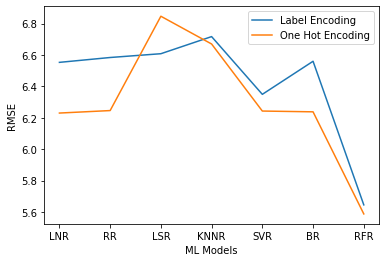

In [34]:
l_array = np.array([rmse,rmse2,rmse3,rmse4,rmse5,rmse6,rmse8])
o_array = np.array([o_linear_rms,o_ridge_rms,o_lasso_rms,o_knn_rms,o_svr_rms,o_bayes_rms,o_random_rms])
models = ["LNR","RR","LSR","KNNR","SVR","BR","RFR"]
plt.plot(models,l_array)
plt.plot(models,o_array)
plt.legend(["Label Encoding","One Hot Encoding"])
plt.xlabel("ML Models")
plt.ylabel("RMSE")
plt.show()

One Hot Encoding is better than Label Encoding for this problem

Also, Random Forest is the best approach for this question.